## Observations and Insights 

1) Based on mean, median and standard deviation, Capomulin (40.676, 41.558 & 4.995) and Ramicane (40.217, 40.673 & 4.846) are the most effective drugs in terms of decreasing or maintaing lower tumor volume.  More support for Capomulin, the line chart for the Capomuin regimen below shows almost all of the mice's tumor volumes decreased over the timepoint range.
2) In the Capomulin regimen there is a strong correlation between weight and tumor value based on the r value of 0.84 and seeing how the plots are all generally close to the line on the scatter plot chart.
3) The least effective drug looks to be Ketapril due to having the highest tumor volume mean and median on the list, but it also has the highest variation and standard deviation.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how= "inner", on= "Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = combined_df["Mouse ID"].count()
mouse_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicates = combined_df[combined_df.duplicated(["Mouse ID"])]
all_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep = 'last').reset_index(drop = True)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_df["Mouse ID"].count()
clean_mouse_count

1888

In [7]:
# Count of mice
clean_mouse_count = clean_df["Mouse ID"].nunique()
clean_mouse_count

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dev = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dev, "SEM": sem}).round(3)
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.383,50.784,43.220,6.574,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
data_summary = clean_df.groupby("Drug Regimen").agg(Mean_Vol=("Tumor Volume (mm3)","mean"),
                                                    Median_Vol=("Tumor Volume (mm3)","median"),
                                                    Var_Vol=("Tumor Volume (mm3)","var"),
                                                    Std_Vol=("Tumor Volume (mm3)","std"),
                                                    SEM_Vol=("Tumor Volume (mm3)","sem")).round(3)
data_summary


,Mean_Vol,Median_Vol,Var_Vol,Std_Vol,SEM_Vol
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.383,50.784,43.220,6.574,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_data = pd.DataFrame(clean_df.groupby(["Drug Regimen"]).nunique()).reset_index()

drugs_df = drug_data[["Drug Regimen", "Mouse ID"]]
drugs_df = drugs_df.set_index("Drug Regimen")
drugs_df

,Mouse ID
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,25
Ramicane,25
Stelasyn,24


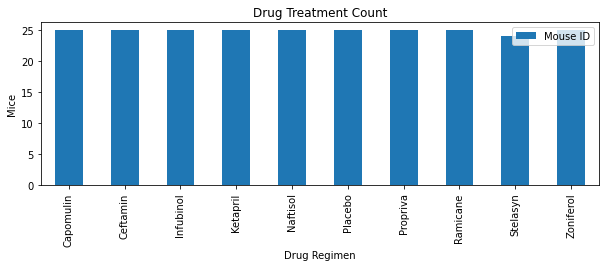

<Figure size 432x288 with 0 Axes>

In [11]:
drugs_df.plot(kind="bar", figsize=(10,3))
             
plt.title("Drug Treatment Count")
plt.ylabel("Mice")
plt.show()
plt.tight_layout()

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
## Creating lists to use for chart
drugs_list = summary_df.index.tolist()
drugs_list


['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [13]:
## Creating lists to use for chart
mice_per_drug = (clean_df.groupby(["Drug Regimen"])["Mouse ID"].nunique())
mice_per_drug

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

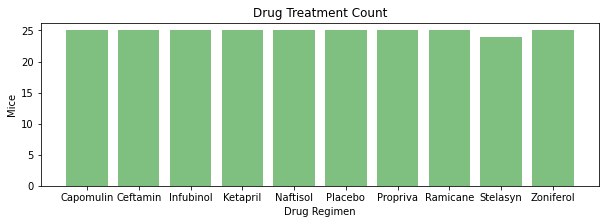

In [14]:
## Bar Chart
plt.figure(figsize=(10,3))
plt.bar(drugs_list, mice_per_drug, color='g', alpha=0.5, align="center",)
plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.show()

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(clean_df.groupby(["Sex"]).nunique()).reset_index()
gender_df = gender_df[["Sex", "Mouse ID"]]
gender_df


,Sex,Mouse ID
0,Female,124
1,Male,125


Text(0, 0.5, '')

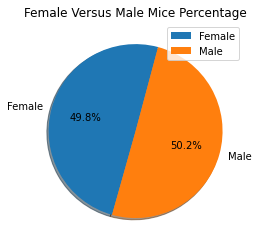

In [16]:
## Pie Plot
gender_df.plot(kind="pie", y = "Mouse ID", startangle= 75, shadow=True, labels=gender_df["Sex"], autopct="%1.1f%%",legend = True)
plt.title("Female Versus Male Mice Percentage")
plt.xlabel("")
plt.ylabel("")

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (clean_df.groupby(["Sex"])["Mouse ID"].nunique()).tolist()
gender_count

[124, 125]

(-1.2376074411803881,
 1.1156067491335013,
 -1.1120581636548073,
 1.1642180996362232)

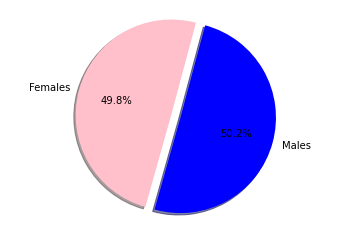

In [18]:
## Pie Chart
labels = ["Females", "Males"]
colors = ["pink", "blue"]
explode = (0.1, 0)

plt.pie(gender_count, explode=explode, labels=labels, colors=colors, shadow=True, autopct="%1.1f%%", startangle=75)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ("Capomulin", "Ramicane", "Infubinol", "Ceftamin")
drug_eval = clean_df.loc[clean_df["Drug Regimen"].isin(drug_list)]
drug_eval

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1863,z581,Infubinol,Female,24,25,25,54.316407,2
1864,z581,Infubinol,Female,24,25,30,56.286750,2
1865,z581,Infubinol,Female,24,25,35,58.628399,3
1866,z581,Infubinol,Female,24,25,40,60.053740,3


In [20]:
clean_df["Timepoint"].max()

45

In [21]:
# Start by getting the last (greatest) timepoint for each mouse
tumor_volume_df = drug_eval.groupby(drug_eval["Mouse ID"]).agg({"Timepoint":["max"]})
tumor_volume_df.columns = ["Timepoint"]

In [22]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_df = tumor_volume_df.reset_index()
merged_df = pd.merge(tumor_volume_df, clean_df, how="left", on=["Mouse ID", "Timepoint"])
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

In [24]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    tumor_vol_by_drug = merged_df["Tumor Volume (mm3)"].loc[merged_df["Drug Regimen"] == drug]
    
    # add subset 
    tumor_vol_data.append(tumor_vol_by_drug)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_by_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"For {drug}, Interquartile Range (IQR) is {iqr}")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"For {drug}, values below {lower_bound} could be outliers")
    print(f"For {drug}, values above {upper_bound} could be outliers")
    

For Capomulin, Interquartile Range (IQR) is 7.781863460000004
For Capomulin, values below 20.70456164999999 could be outliers
For Capomulin, values above 51.83201549 could be outliers
For Ramicane, Interquartile Range (IQR) is 9.098536719999998
For Ramicane, values below 17.912664470000003 could be outliers
For Ramicane, values above 54.30681135 could be outliers
For Infubinol, Interquartile Range (IQR) is 11.477135160000003
For Infubinol, values below 36.83290494999999 could be outliers
For Infubinol, values above 82.74144559000001 could be outliers
For Ceftamin, Interquartile Range (IQR) is 15.577752179999997
For Ceftamin, values below 25.355449580000002 could be outliers
For Ceftamin, values above 87.66645829999999 could be outliers


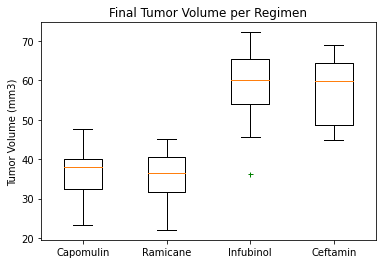

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlierproperties = dict(marker = "+", markerfacecolor = "g", markersize = 5, markeredgecolor = "g")

plt.boxplot(tumor_vol_data, flierprops = outlierproperties)

plt.title("Final Tumor Volume per Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()

## Line and Scatter Plots

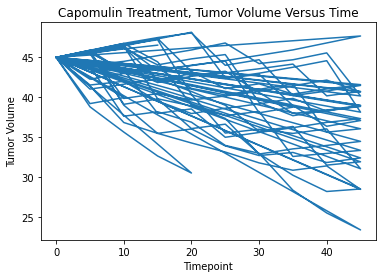

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin"),:]

## Variables
tumor_vol = capomulin_df["Tumor Volume (mm3)"]
timepoint = capomulin_df["Timepoint"]

## Line Plot
tumor_vol_line = plt.plot(timepoint, tumor_vol)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Capomulin Treatment, Tumor Volume Versus Time")
plt.show()

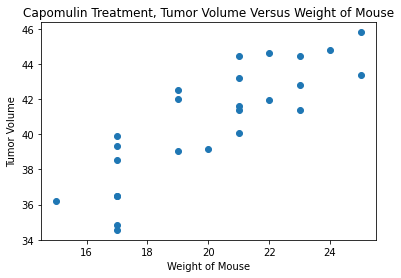

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
## Variables
mouse_weight = capomulin_df.groupby(capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capomulin_df.groupby(capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

## Scatter Plot
plt.scatter(mouse_weight, tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.title("Capomulin Treatment, Tumor Volume Versus Weight of Mouse")
plt.show()

## Correlation and Regression

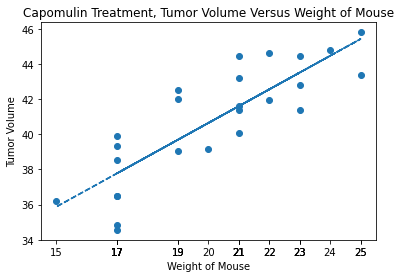

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

## Variables (from above)
mouse_weight = capomulin_df.groupby(capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capomulin_df.groupby(capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

## Perform a linear regression on mouse weight vs tumor volume for the Capomulin regimen
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)

## Equation of line
fit = slope * mouse_weight + int

## Plot line on scattter plot from above
plt.scatter(mouse_weight, tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.title("Capomulin Treatment, Tumor Volume Versus Weight of Mouse")
plt.plot(mouse_weight, fit, "--")
plt.xticks(mouse_weight)
plt.show()


In [29]:
# Calculate the correlation coefficient
corr = round(st.pearsonr(mouse_weight, tumor_volume)[0],2)
print(f"The correlation between weight and tumor value is {corr} for the Capomulin regimen")

The correlation between weight and tumor value is 0.84 for the Capomulin regimen
